**Linear Regression- ML Class**

This is the first programming assignment for the ML-Course 

In [35]:
import matplotlib.pyplot as pl
import numpy as np

In [36]:
f = open('ex1data1.txt')
raw = f.read()
lines = filter(lambda x: len(x.strip()) > 0, raw.split('\n'))
x, y = [], []
for line in lines:
    xval, yval = map(float, line.split(','))
    x.append(xval)
    y.append(yval)
    
xnp = np.array(x).reshape((len(x),1))
ynp = np.array(y).reshape((len(y), 1))

**Plot the raw data in matplotlib**

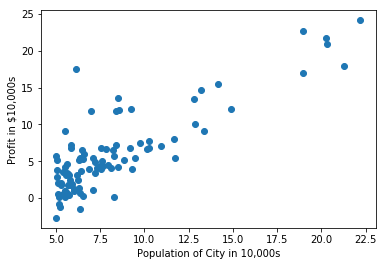

In [37]:
pl.scatter(xnp, ynp)
pl.ylabel('Profit in $10,000s')
pl.xlabel('Population of City in 10,000s')
pl.show()

In [38]:
def get_cost(x, y, h):
    m, n = x.shape
    fm = float(m)    
    return ((1/(2*fm)) * np.dot((h-y).transpose(),(h-y)))

**Gradient Descent function**

In [39]:
def gradient_descent(x, y):
    m, n = x.shape
    fm = float(m)
    X = np.append(np.ones((m, 1)), x, 1)
    thetas = np.zeros((n+1, 1))
    
    print 'X' 
    print X[:4]
    print 'Thetas' 
    print thetas
    
    iterations = 15000
    alpha = 0.01
    j = np.zeros(iterations)
    
    for i in range(iterations):
        h = X.dot(thetas)
        diff = h - y
        d = X.T.dot(diff)
        thetas = thetas - (1/fm)*alpha*d
        j[i] = get_cost(x, y, h)
        
    return [thetas, j]

Get the result of gradient descent, and print the cost function over time

X
[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]]
Thetas
[[ 0.]
 [ 0.]]


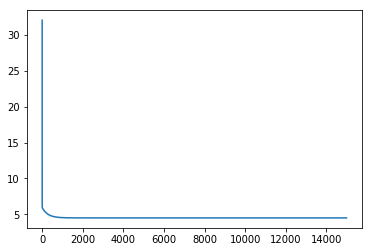

In [40]:
thetas, j = gradient_descent(xnp, ynp)
X = np.append(np.ones((xnp.shape[0], 1)), xnp, 1)
Y = X.dot(thetas)

pl.plot(j)
pl.show()

View the linear regression graph

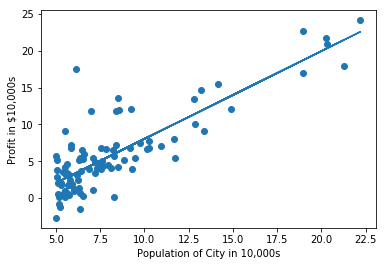

In [41]:
pl.scatter(xnp, ynp)
pl.ylabel('Profit in $10,000s')
pl.xlabel('Population of City in 10,000s')
pl.plot(xnp, Y)
pl.show()

Try predicting some values

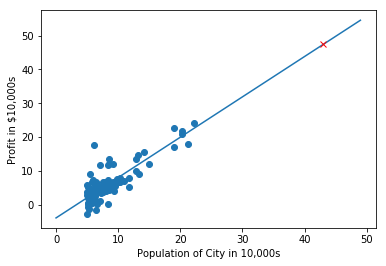

In [42]:
def predict(x, thetas):
    xarr = np.array([1, x])
    pred = xarr.T.dot(thetas)
    return pred[0]

prediction = predict(43, thetas)

#Plot the predicted value
pl.scatter(xnp, ynp)
pl.ylabel('Profit in $10,000s')
pl.xlabel('Population of City in 10,000s')
pX = np.arange(50)
pY = np.array([k*thetas[1] + thetas[0] for k in pX])
pl.plot(pX, pY)
pl.plot(43, prediction, 'rx')
pl.show()